# Heavy Traffic Indicators

This project will analyze traffic patterns on I-94.

In [52]:
# importing the file #

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
print(traffic.head())
print('\n')
print(traffic.tail())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  


      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0 

In [53]:
traffic.info()
print('\n')
traffic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB




,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


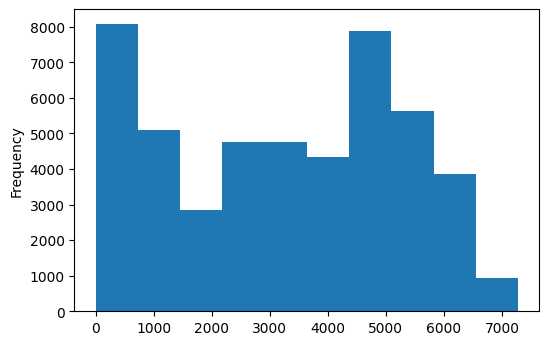

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
traffic['traffic_volume'].plot.hist()

In [55]:
traffic['date_time1'] = pd.to_datetime(traffic['date_time'])

In [56]:
traffic['date_time1'].describe()

count                   48204
unique                  40575
top       2013-04-18 22:00:00
freq                        6
first     2012-10-02 09:00:00
last      2018-09-30 23:00:00
Name: date_time1, dtype: object

In [57]:
traffic['date_time1'].head()

0   2012-10-02 09:00:00
1   2012-10-02 10:00:00
2   2012-10-02 11:00:00
3   2012-10-02 12:00:00
4   2012-10-02 13:00:00
Name: date_time1, dtype: datetime64[ns]

In [58]:
traffic['hour'] = traffic['date_time1'].dt.hour

In [59]:
traffic['hour'].describe()

count    48204.000000
mean        11.398162
std          6.940238
min          0.000000
25%          5.000000
50%         11.000000
75%         17.000000
max         23.000000
Name: hour, dtype: float64

In [60]:
day = traffic[(traffic['hour'] > 7) & (traffic['hour'] < 19)]
night = traffic[(traffic['hour'] <= 7) | (traffic['hour'] >= 19)]

In [61]:
# examining the day dataframe

print(day.head())
print('\n')
print(day.tail())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  \
0    scattered clouds  2012-10-02 09:00:00            5545   
1       broken clouds  2012-10-02 10:00:00            4516   
2     overcast clouds  2012-10-02 11:00:00            4767   
3     overcast clouds  2012-10-02 12:00:00            5026   
4       broken clouds  2012-10-02 13:00:00            4918   

           date_time1  hour  
0 2012-10-02 09:00:00     9  
1 2012-10-02 10:00:00    10  
2 2012-10-02 11:00:00    11  
3 2012-10-02 12:00:00    12  
4 2012-10-02 13:00:00    13  


      holiday    temp  rain_1h  snow_1h  clouds_all weather_

In [62]:
# examining the night dataframe

print(night.head())
print('\n')
print(night.tail())

   holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
10    None  290.97      0.0      0.0          20       Clouds   
11    None  289.38      0.0      0.0           1        Clear   
12    None  288.61      0.0      0.0           1        Clear   
13    None  287.16      0.0      0.0           1        Clear   
14    None  285.45      0.0      0.0           1        Clear   

   weather_description            date_time  traffic_volume  \
10          few clouds  2012-10-02 19:00:00            3539   
11        sky is clear  2012-10-02 20:00:00            2784   
12        sky is clear  2012-10-02 21:00:00            2361   
13        sky is clear  2012-10-02 22:00:00            1529   
14        sky is clear  2012-10-02 23:00:00             963   

            date_time1  hour  
10 2012-10-02 19:00:00    19  
11 2012-10-02 20:00:00    20  
12 2012-10-02 21:00:00    21  
13 2012-10-02 22:00:00    22  
14 2012-10-02 23:00:00    23  


      holiday    temp  rain_1h  snow_1h  c

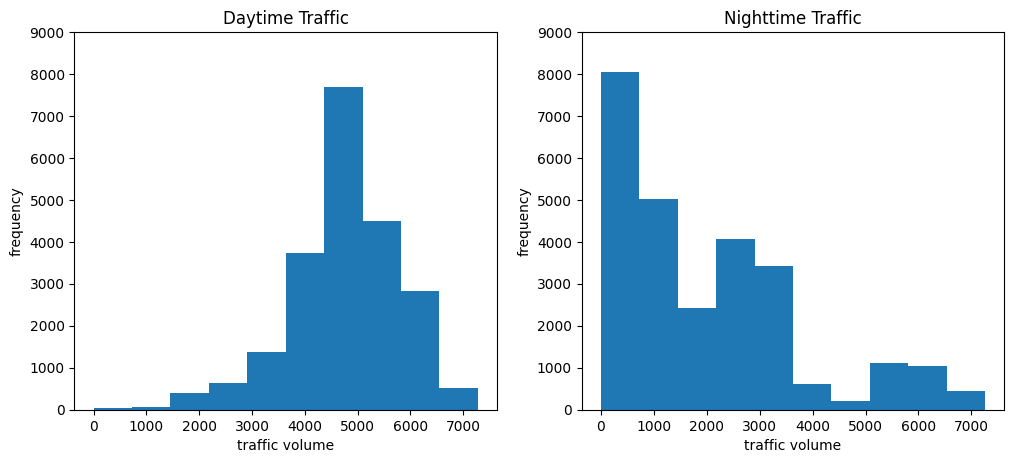

In [63]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
day['traffic_volume'].plot.hist()
plt.title('Daytime Traffic')
plt.xlabel('traffic volume')
plt.ylabel('frequency')
plt.ylim(0,9000)

plt.subplot(1,2,2)
night['traffic_volume'].plot.hist()
plt.title('Nighttime Traffic')
plt.xlabel('traffic volume')
plt.ylabel('frequency')
plt.ylim(0,9000)
plt.show()

Daytime traffic tends to have higher volumes, with mean around 4,700. Nighttime traffic is lighter, with mean around 2,000. Starting to focus on the day dateframe only.

In [64]:
day['date_time1'].head()
day['month'] = day['date_time1'].dt.month

In [66]:
day.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,date_time1,hour,month
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,2012-10-02 09:00:00,9,10
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,2012-10-02 10:00:00,10,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,2012-10-02 11:00:00,11,10
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,2012-10-02 12:00:00,12,10
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,2012-10-02 13:00:00,13,10


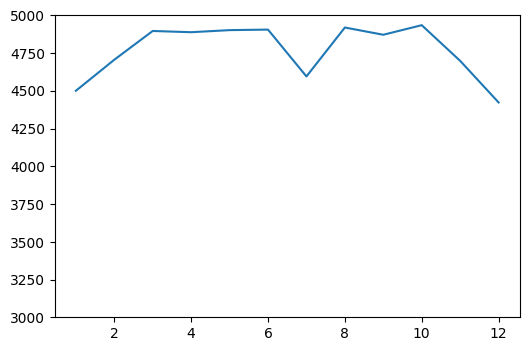

In [71]:
# getting the average traffic volume by month

by_month = day.groupby('month').mean()
plt.plot(by_month['traffic_volume'])
plt.ylim(3000,5000)
plt.show()

Traffic is less in January, July and in December.

In [72]:
# getting day of week data

day['day_of_week'] = day['date_time1'].dt.dayofweek
day.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,date_time1,hour,month,day_of_week
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,2012-10-02 09:00:00,9,10,1
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,2012-10-02 10:00:00,10,10,1
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,2012-10-02 11:00:00,11,10,1
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,2012-10-02 12:00:00,12,10,1
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,2012-10-02 13:00:00,13,10,1


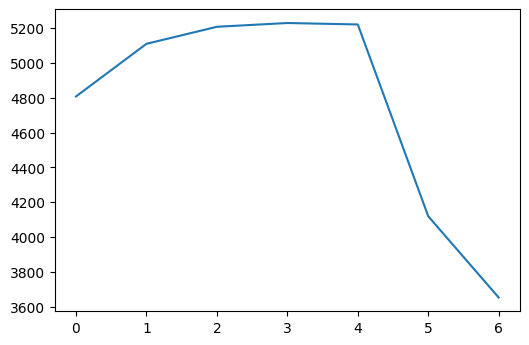

In [76]:
by_dayofweek = day.groupby('day_of_week').mean()
plt.plot(by_dayofweek['traffic_volume'])

There is much less traffic on Saturdays and Sundays. As a next step, I will isolate weekdays vs weekends.

In [77]:
weekdays = day[day['day_of_week'] <= 4]
weekends = day[day['day_of_week'] >= 5]

In [79]:
# examining weekdays

print(weekdays.head())
print('\n')
print(weekdays.tail())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  \
0    scattered clouds  2012-10-02 09:00:00            5545   
1       broken clouds  2012-10-02 10:00:00            4516   
2     overcast clouds  2012-10-02 11:00:00            4767   
3     overcast clouds  2012-10-02 12:00:00            5026   
4       broken clouds  2012-10-02 13:00:00            4918   

           date_time1  hour  month  day_of_week  
0 2012-10-02 09:00:00     9     10            1  
1 2012-10-02 10:00:00    10     10            1  
2 2012-10-02 11:00:00    11     10            1  
3 2012-10-02 12:00:00    12     10        

In [81]:
# examining weekends

print(weekends.head())
print('\n')
print(weekends.tail())

   holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
88    None  274.99      0.0      0.0           1        Clear   
89    None  275.09      0.0      0.0          40       Clouds   
90    None  276.88      0.0      0.0          20       Clouds   
91    None  278.04      0.0      0.0          20       Clouds   
92    None  279.08      0.0      0.0          40       Clouds   

   weather_description            date_time  traffic_volume  \
88        sky is clear  2012-10-06 08:00:00            3342   
89    scattered clouds  2012-10-06 09:00:00            4258   
90          few clouds  2012-10-06 10:00:00            4861   
91          few clouds  2012-10-06 11:00:00            5191   
92    scattered clouds  2012-10-06 12:00:00            5669   

            date_time1  hour  month  day_of_week  
88 2012-10-06 08:00:00     8     10            5  
89 2012-10-06 09:00:00     9     10            5  
90 2012-10-06 10:00:00    10     10            5  
91 2012-10-06 11:00:00    

Grouping by hour of day - weekdays and weekends:

In [84]:
byhour_weekdays = weekdays.groupby('hour').mean()
print(byhour_weekdays['traffic_volume'])
print('\n')
byhour_weekends = weekends.groupby('hour').mean()
print(byhour_weekends['traffic_volume'])

hour
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64


hour
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


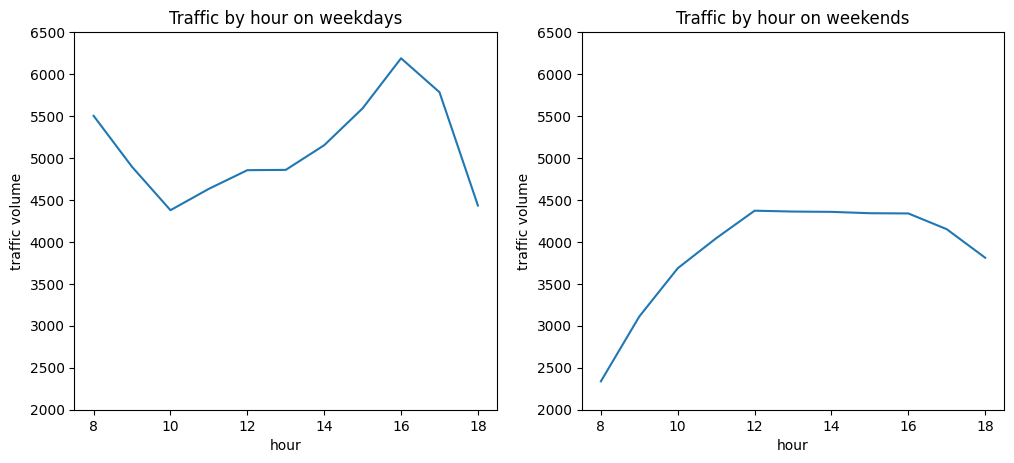

In [88]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(byhour_weekdays['traffic_volume'])
plt.title('Traffic by hour on weekdays')
plt.xlabel('hour')
plt.ylabel('traffic volume')
plt.ylim(2000,6500)

plt.subplot(1,2,2)
plt.plot(byhour_weekends['traffic_volume'])
plt.title('Traffic by hour on weekends')
plt.xlabel('hour')
plt.ylabel('traffic volume')
plt.ylim(2000,6500)

plt.show()

Rush hours on business days are 8 and 16, whereas there are no rush hours on weekends.

In [95]:
weekdays.corr()['traffic_volume']

temp              0.174601
rain_1h           0.003904
snow_1h          -0.004538
clouds_all       -0.081217
traffic_volume    1.000000
hour              0.196712
month            -0.020786
day_of_week       0.163095
Name: traffic_volume, dtype: float64

The weather column with strongest correlation with traffic volume is temp, although the correlation is not strong.

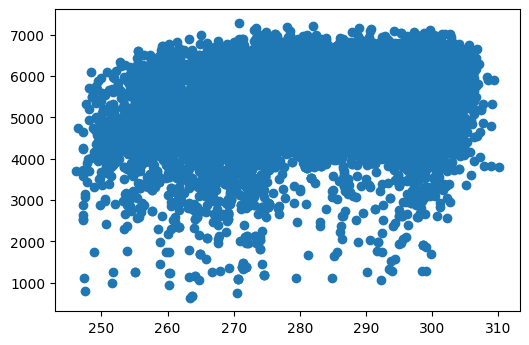

In [97]:
plt.scatter(weekdays['temp'],weekdays['traffic_volume'])

Aggregating traffic volume by weather_main and weather_description:

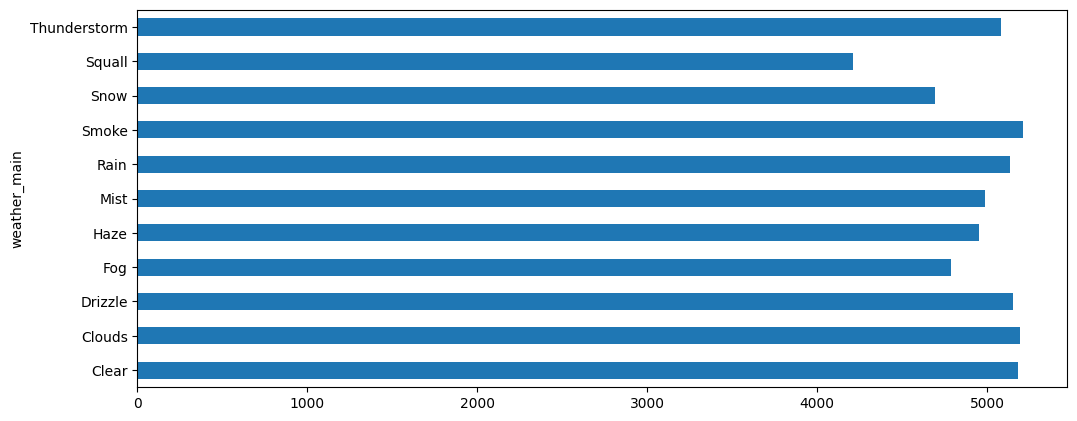

In [103]:
by_weather_main = weekdays.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh(figsize=(12,5))

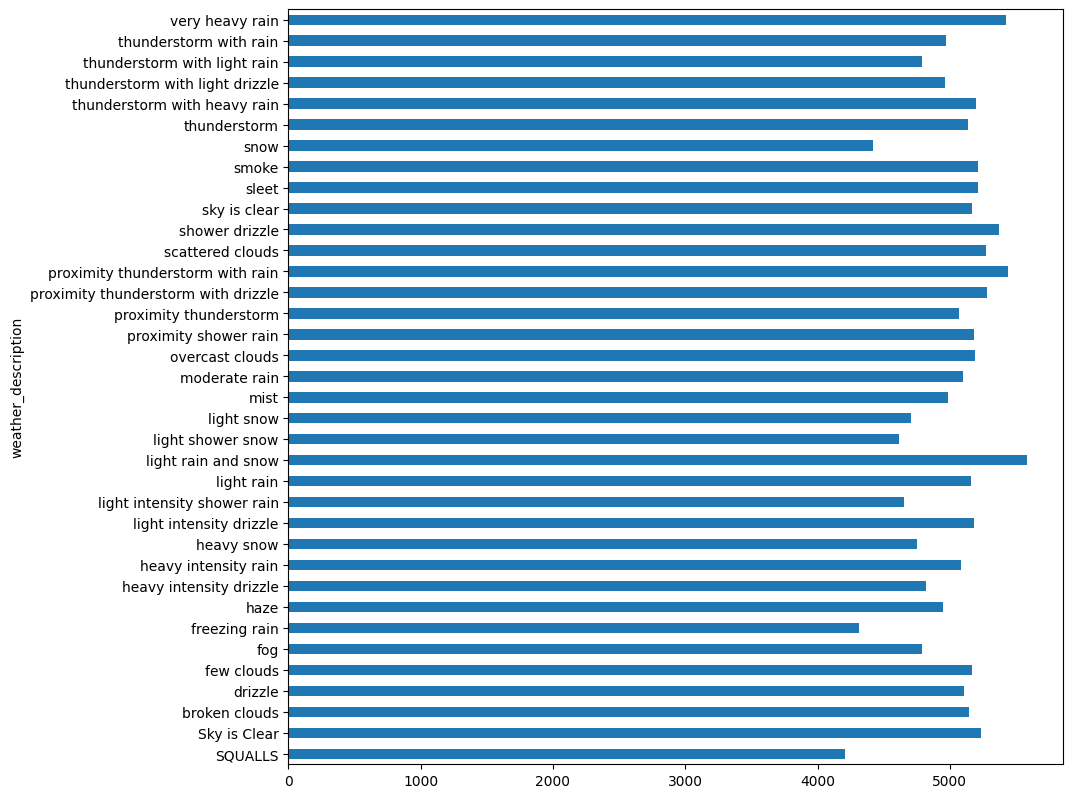

In [110]:
by_weather_description = weekdays.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(10,10))

It seems that there is lighter traffic in squalls, freezing rain and snow.